# Author :-  Furqan Khalil
# Task 2 : Find Optimum Numbers of Clusters on given Iris Dataset

In [1]:
#Importing Important Libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
#Loading Dataset

data = pd.read_csv('E:\Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data = data.drop(columns = ['Id'])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
Setosa = data.iloc[:50,:]
Setosa.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
45,4.8,3.0,1.4,0.3,Iris-setosa
46,5.1,3.8,1.6,0.2,Iris-setosa
47,4.6,3.2,1.4,0.2,Iris-setosa
48,5.3,3.7,1.5,0.2,Iris-setosa
49,5.0,3.3,1.4,0.2,Iris-setosa


In [10]:
Versicolor = data.iloc[50:100,:]
Versicolor.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor


In [16]:
Virginica = data.iloc[100:150,:]
len(Virginica)

50

# Visualizing our Data

# 1) Comparing Petal Length and Width

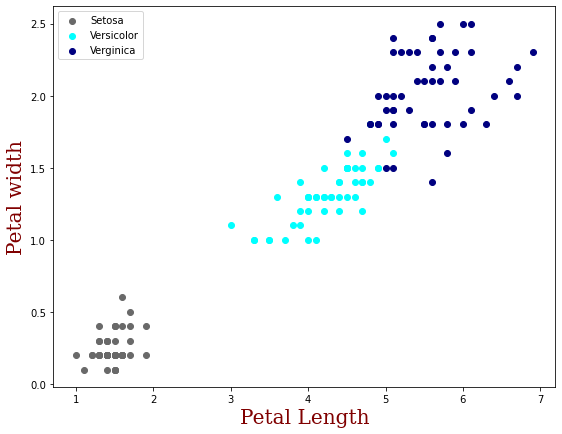

In [60]:
plt.figure(figsize = (9,7))

plt.scatter(Setosa['PetalLengthCm'], Setosa['PetalWidthCm']  , color = 'dimgray',label = 'Setosa' )
plt.scatter(Versicolor['PetalLengthCm'], Versicolor['PetalWidthCm'] , color = 'cyan',label = 'Versicolor' )
plt.scatter(Virginica['PetalLengthCm'], Virginica['PetalWidthCm']  , color = 'navy', label = 'Verginica' )

font1 = {'family':'serif','color':'maroon','size':20}

plt.xlabel('Petal Length',font1)
plt.ylabel('Petal width',font1)
plt.legend()

# 2) Comparing Sepal Length and Width

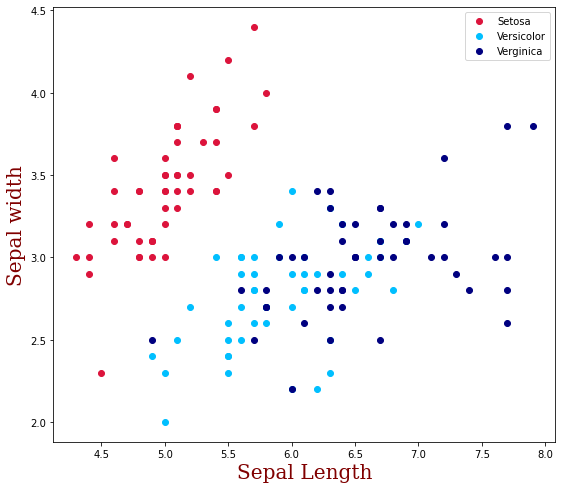

In [71]:
plt.figure(figsize = (9,8))

plt.scatter(Setosa['SepalLengthCm'], Setosa['SepalWidthCm']  , color = 'crimson',label = 'Setosa' )
plt.scatter(Versicolor['SepalLengthCm'], Versicolor['SepalWidthCm'] , color = 'deepskyblue',label = 'Versicolor' )
plt.scatter(Virginica['SepalLengthCm'], Virginica['SepalWidthCm']  , color = 'navy', label = 'Verginica' )

font1 = {'family':'serif','color':'maroon','size':20}

plt.xlabel('Sepal Length',font1)
plt.ylabel('Sepal width',font1)
plt.legend()

# Elbow Method to find Optimum number of Clusters

C:\Users\Furqan Khalil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


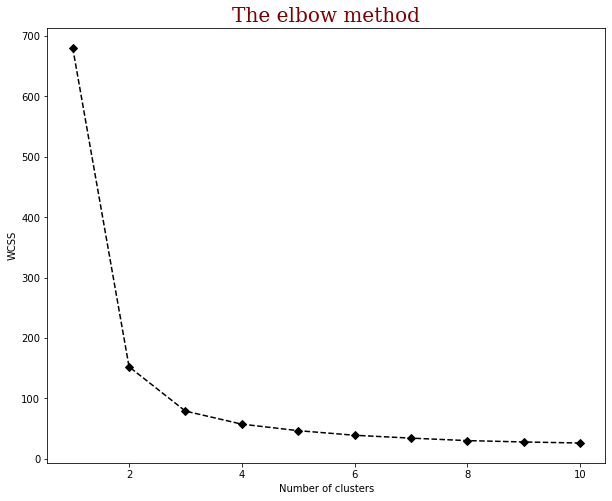

In [72]:
x = data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss,linestyle = 'dashed',marker='D',c='k')

font1 = {'family':'serif','color':'maroon','size':20}

plt.title('The elbow method',font1)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

# K-Means Clustering

In [34]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)
predictions = model.fit_predict(x)
print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [41]:
centriods = model.cluster_centers_
centriods

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

# Visualizing Clusters and their Centroids

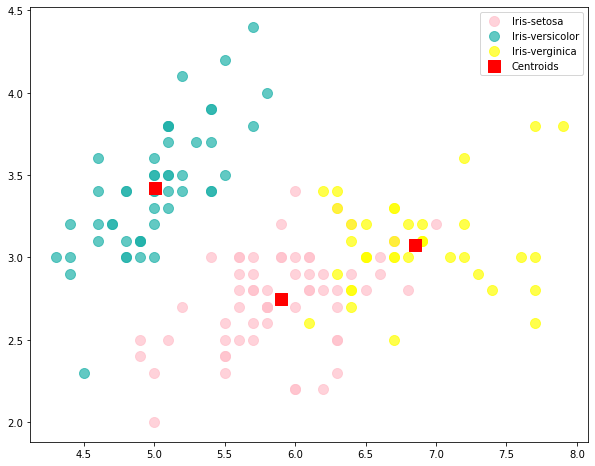

In [70]:
plt.figure(figsize = (10,8))


plt.scatter(x[predictions == 0,0], x[predictions == 0,1] , s = 100,c = 'pink',label = 'Iris-setosa',alpha = 0.7)
plt.scatter(x[predictions == 1,0], x[predictions == 1,1] , s = 100,c = 'lightseagreen',label = 'Iris-versicolor',alpha = 0.7)
plt.scatter(x[predictions == 2,0], x[predictions == 2,1] , s = 100,c = 'yellow',label = 'Iris-verginica',alpha = 0.7)

#Centroid Plotting of the clusters
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s = 150,c = 'red',marker = 's',label = 'Centroids')
plt.legend()
plt.show()